# Problem Statement
A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an **automobile consulting company** to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:


*   Which variables are significant in predicting the price of a car
*   How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 
 
## Business Goal 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 
 
## Data Preparation
*    There is a variable named **CarName** which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, **chevrolet impala** has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 
 
## Model Evaluation:
*    When you're done with model building and residual analysis, and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared **score on the test set**.
 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

*    where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

**Please don't forget to perform this step** as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.
 
### Downloads:
You can download the dataset file from the link given below:
https://cdn.upgrad.com/UpGrad/temp/a9f2334f-9eb2-4160-8486-701584204e08/CarPrice_Assignment.csv

https://cdn.upgrad.com/UpGrad/temp/a5ae64ac-9490-44a5-ac06-c8b97e76937d/Data%20Dictionary%20-%20carprices.xlsx

## Step - 1: Reading, understanding and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

pd.set_option('mode.chained_assignment', None)

In [2]:
automobile = pd.read_csv('CarPrice_Assignment.csv')
automobile.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
automobile.shape

(205, 26)

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Luckily we do not have the missing value in here. So, we do not need to impute or discard or treat missing values.

## Cleaning data

In [5]:
automobile.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [6]:
# Its assigned insurance risk rating, 
# A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 

#let us devide symboling into 3 groups 
# symboling = +3 safe_risk_rating
# symboling < 3 and symboling > -2 moderate_risk_rating
# symboling = -2 risky_risk_rating
automobile.symboling = automobile.symboling.map({3:'safe',2:'safe',1:'moderate',0:'moderate',-1:'risky',-2:'risky'})

In [7]:
automobile=automobile.rename(columns={'symboling':'riskrating'})

In [11]:
# lets convert all object datatype data to lower case
for col in automobile.columns:
    if automobile[col].dtype == 'object':
        automobile[col]= automobile[col].apply(lambda x: str(x).lower())

In [12]:
#drop duplicates if any
print(automobile.shape)
automobile.drop_duplicates(inplace=True)
print(automobile.shape)

(205, 26)
(205, 26)


In [13]:
# derive brand from car name
automobile['brand']=automobile['CarName'].apply(lambda x: x[:x.find(' ')])

In [14]:
# let us have a look at the different brands involved
automobile.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subar', 'subaru', 'toyota',
       'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We see that there are some spelling variant of same name.


*   maxda -> mazda
*   porcshce -> porsche
*   subar -> subaru
*   toyouta -> toyota
*   vokswagen -> volkswagen
*   vw -> volkswagen



In [15]:
correct_spells = {'maxda':'mazda','porcshce':'porsche','subar':'subaru','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}

In [16]:
def replace_series_values(s, spells):
    for old_value in spells.keys():
        print('replacing.. ''{}'' -> ''{}'''.format(old_value,spells[old_value]))
        s = s.apply(lambda x: spells[old_value] if x==old_value else x)
    return s

automobile.brand = replace_series_values(automobile.brand, correct_spells)

replacing.. maxda -> mazda
replacing.. porcshce -> porsche
replacing.. subar -> subaru
replacing.. toyouta -> toyota
replacing.. vokswagen -> volkswagen
replacing.. vw -> volkswagen


In [17]:
automobile.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
#let us extract model from car name
automobile['model']=automobile.CarName.apply(lambda x: x[x.find(' '):].strip(' '))

In [19]:
def move_column_position(df, col, index):
    col_temp = col+'_temp'
    if col_temp in df.columns:
        del df[col_temp]

    df.insert(index, col_temp, df[col])
    del df[col]
    df.rename(columns={col_temp:col}, inplace = True)

In [20]:
move_column_position(automobile,'brand', 3)
move_column_position(automobile,'model',4)

In [21]:
# let us drop the CarName column now as we do not need the same anymore.
del automobile['CarName']

# car id is irrelivant for data analysis, so let us delete that too
del automobile['car_ID']

In [22]:
automobile.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

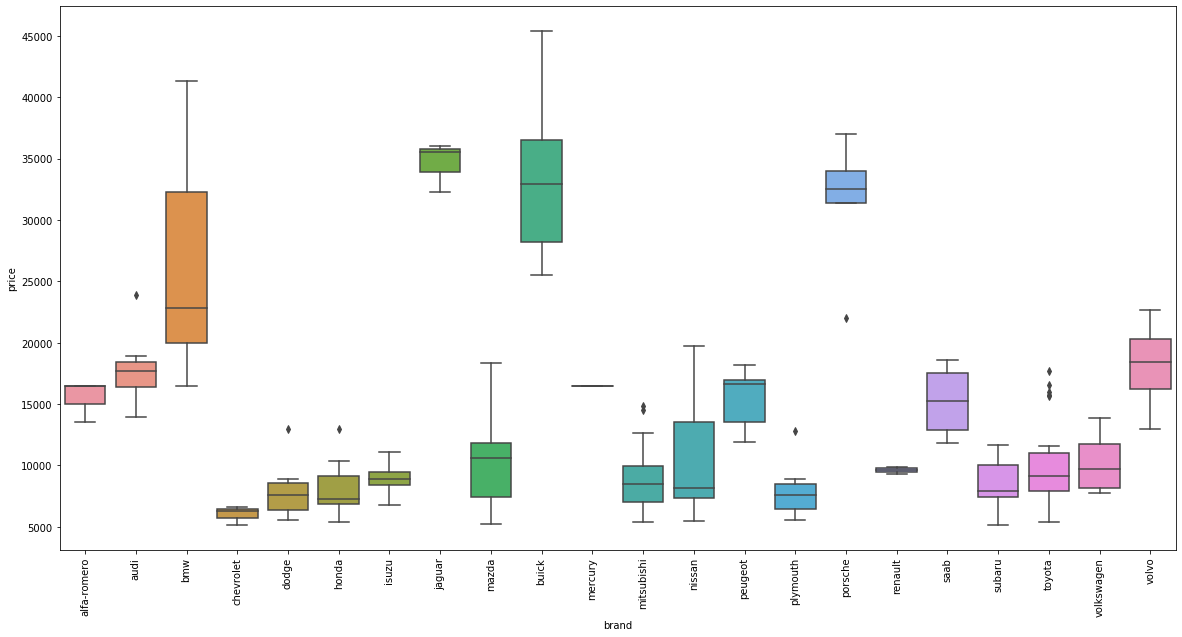

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'brand', y = 'price', data = automobile)
plt.xticks(rotation=90)
plt.show()

We see that some brands are highly priced. So, clearly brand value does affect price. So, let us devide the cars

In [24]:
automobile.groupby('brand').price.mean().sort_values(ascending=False)

brand
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

Deviding the cars in three section based on price
1. luxury (x > 20000)
2. economy (20000 > x > 10000)
3. budget  (x < 10000)

In [25]:
automobile['car_category']=automobile['price'].apply(lambda x: 'luxury' if x > 20000 else 'economy' if x > 10000 else 'budget')

In [26]:
# dropping the brand column
automobile.drop('brand',axis=1,inplace=True)

In [27]:
automobile.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let us visualise the data. There are two things we need to do


*   Whether the price has linear relationship at all with other variables
*   Check for multi colinearity (whether any of the variables have high correlation with the other)



### Visualising contineous variables

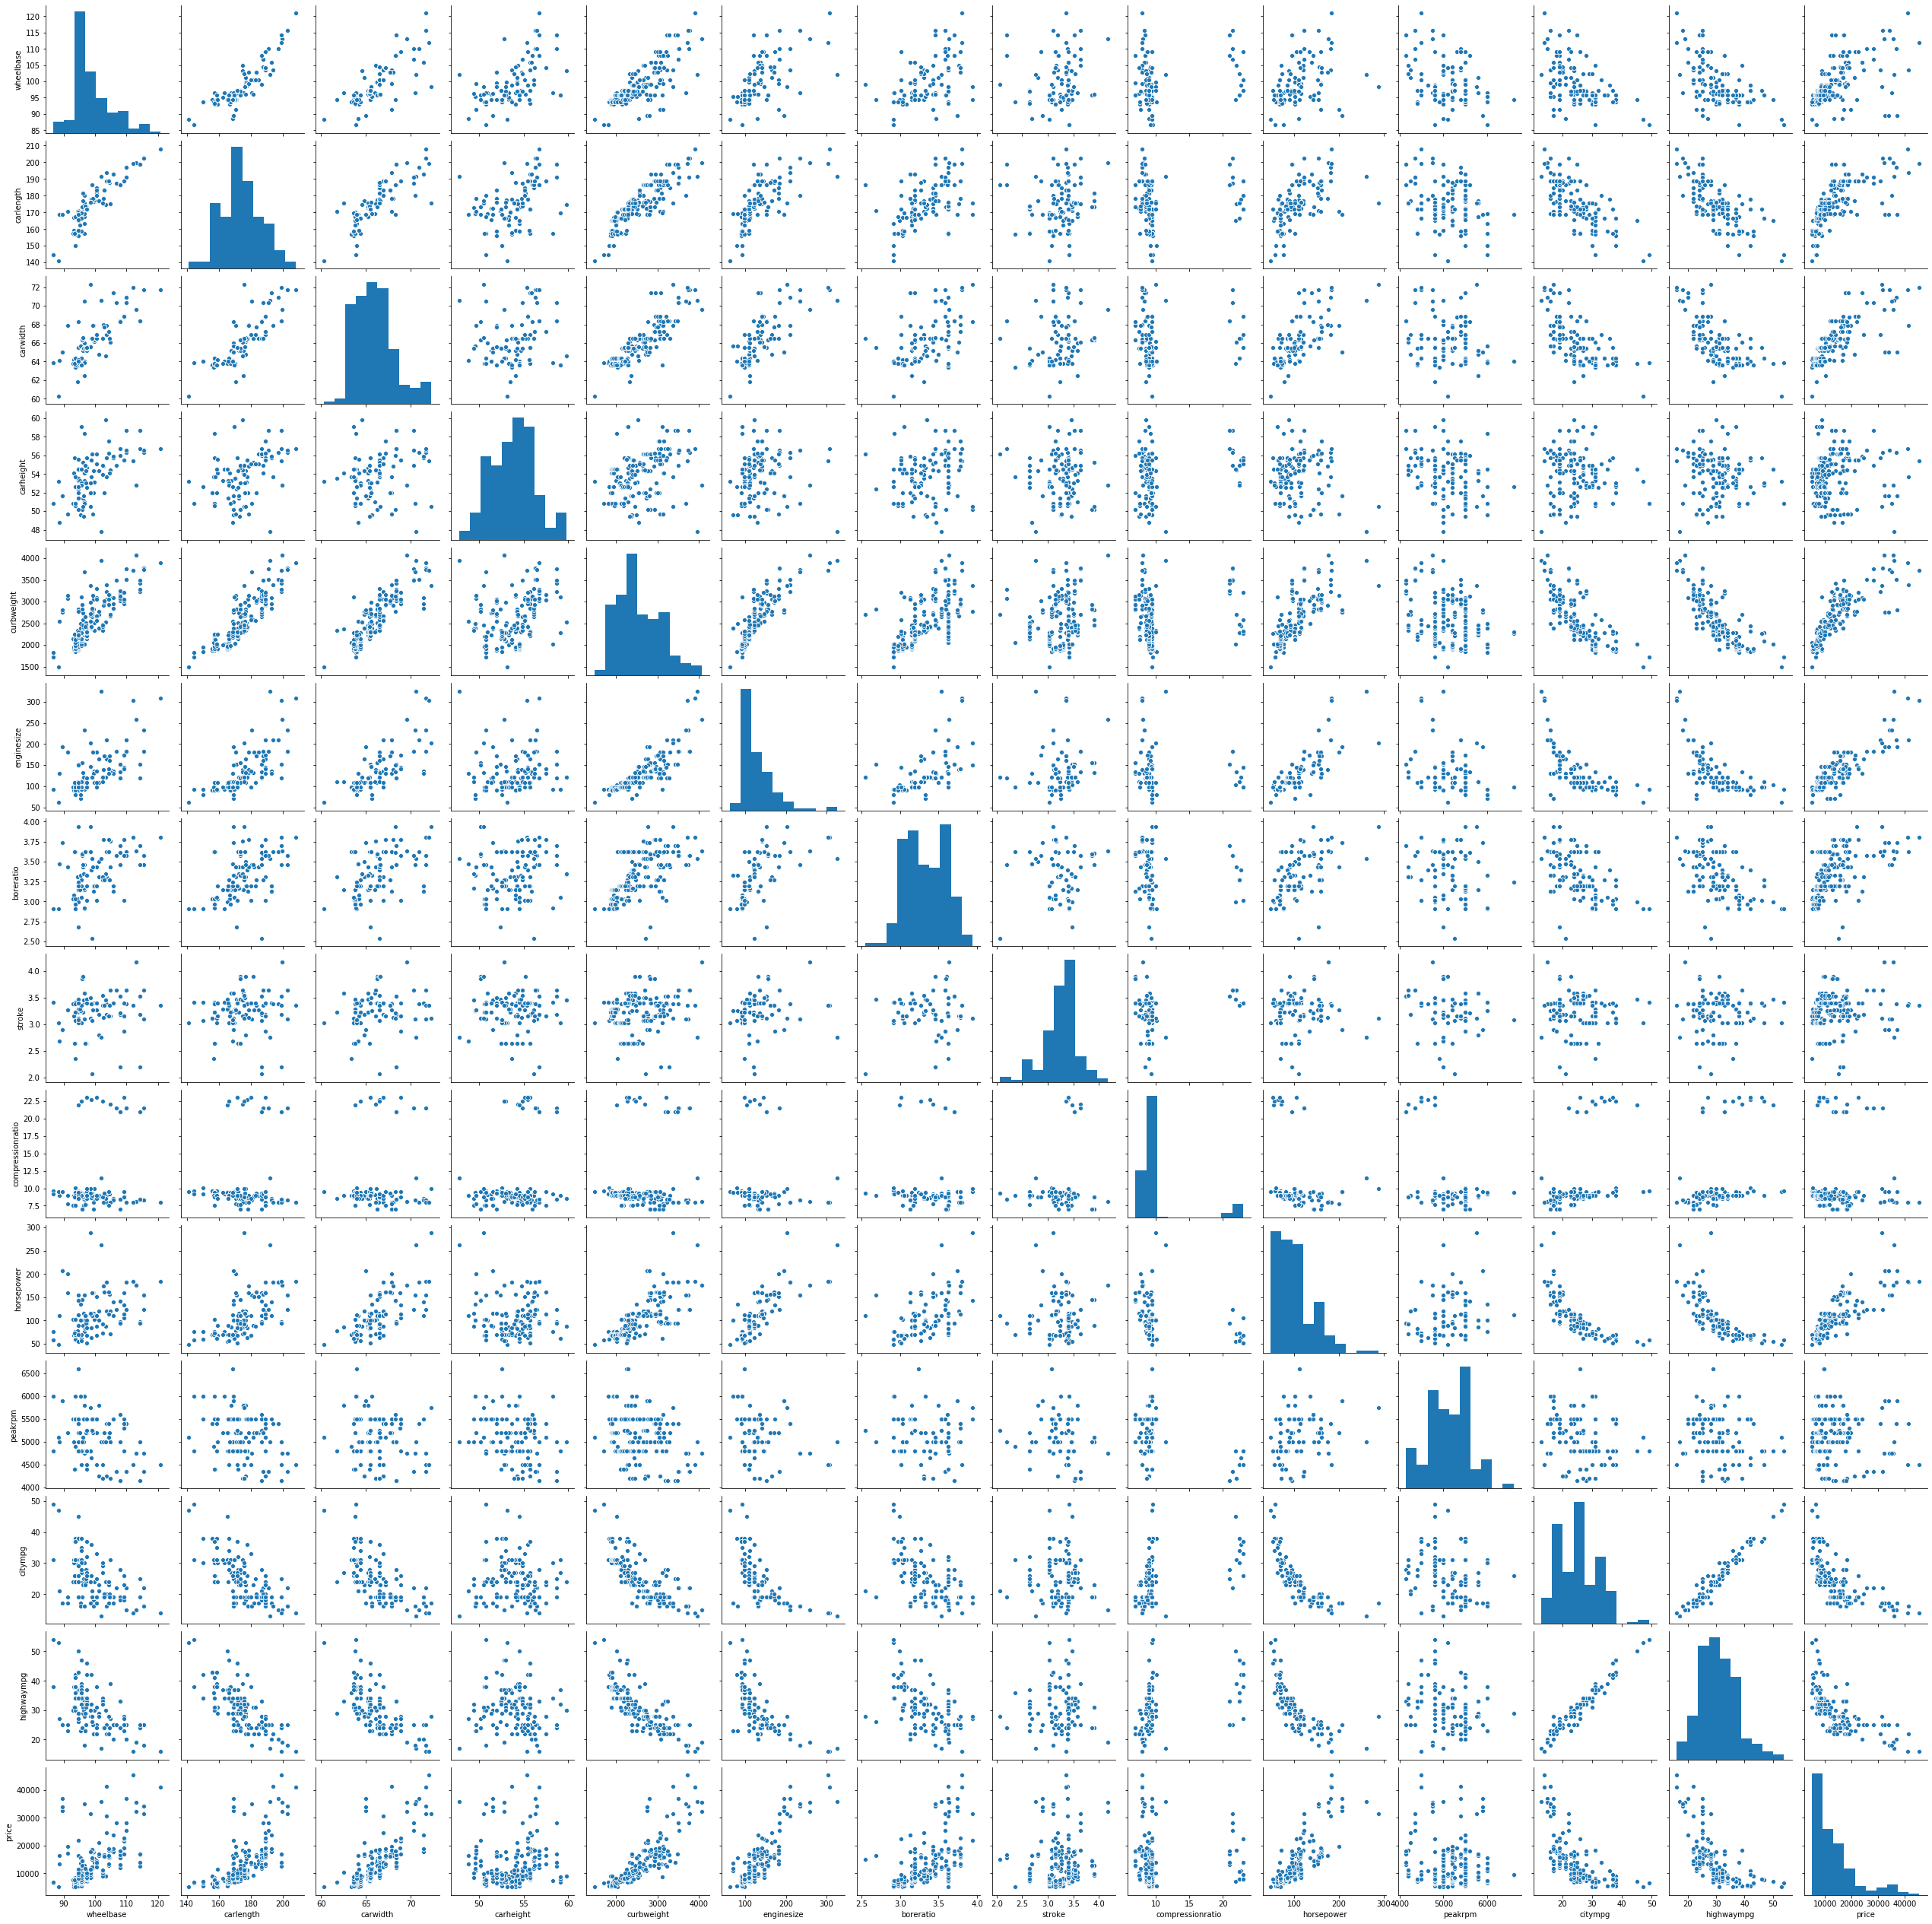

In [28]:
sns.pairplot(automobile)
plt.show()

*    We see that there are some sort of positive linear relationship between 
price vs (carlength, wheelbase, carwidth, curbweight, enginesize,horsepower, peakrpm). So, definitely price has linear relationship (not perfect) with some of the variables.

*    There is a linear negative relationship between the citympg and highwaympg.

*     Carheight and peakrpm is having datapoints speard a lot. So, it is seen to be no linear relationship or probably insignificant for our price prediction using MLR.

### Visualising categorical variables

In [29]:
automobile.head(2)

,riskrating,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_category
0,safe,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,economy
1,safe,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,economy


In [30]:
categorical_variables = ['riskrating','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','car_category']

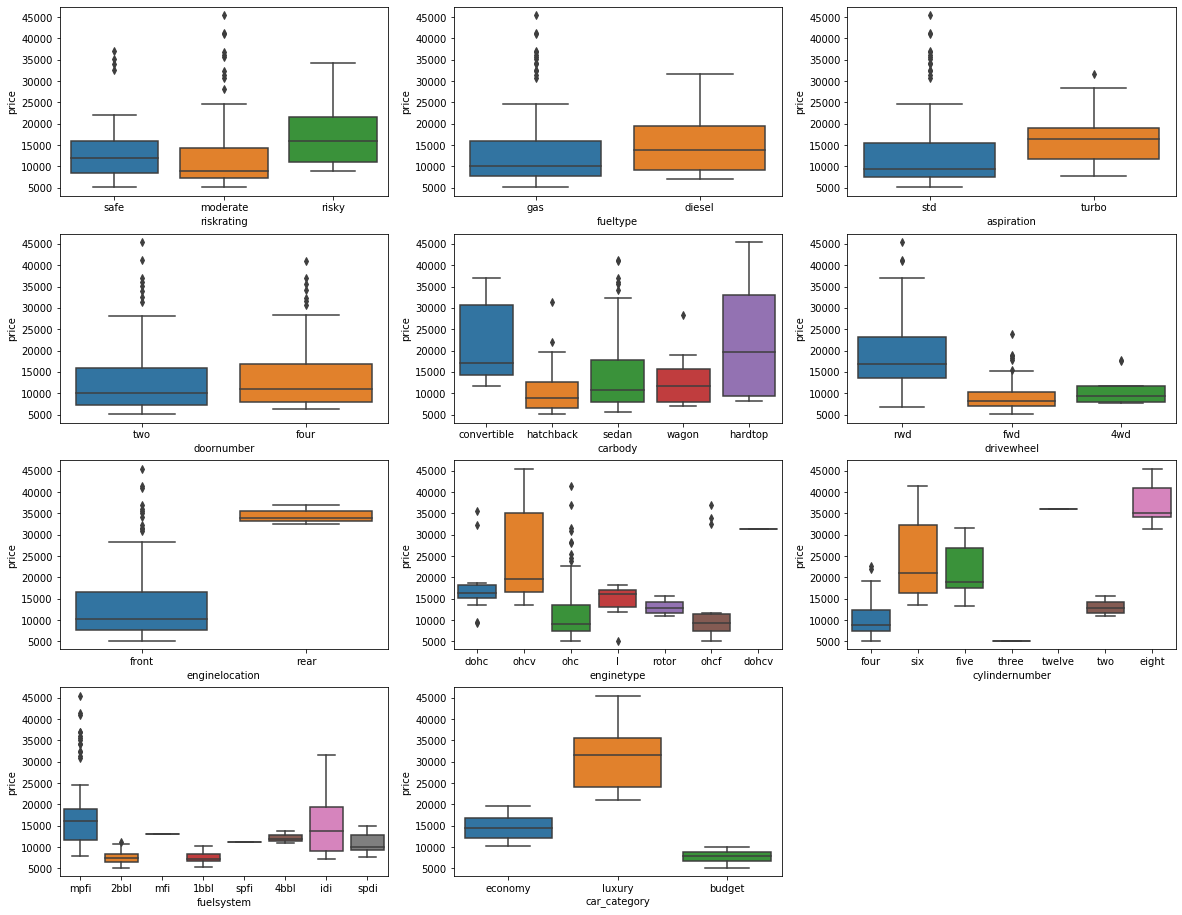

In [31]:
plt.figure(figsize=(20,16))

count = 1
for category in categorical_variables:
  plt.subplot(4,3,count)
  sns.boxplot(x=category, y='price', data=automobile)
  count = count+1

count = 0


*   Risky risktaking are priced higher
*   Fueltype diesel are having a bit higher price that of gas type.
*   Cars with aspiration turbo are having higher price than that of std.
*   Doornumber has no visible effect on price
*   Carbody of convertible type are priced higher than that of hatchback, sedan, wagon. Hardtop has both higher end car as well as low priced cars and overall median lies above all other variants.
*   Rwd is the clear winner when it comes to drivewheel, that means rwd is clearly on demand and priced high.
*   Engine at the rear are way costlier than the front. The spead is low which indicated that most of the cars with rear engines are priced at around 35000.
*   Overall, it seems like number of cylinders is having a direct relationship with price. Mpfi fuel system cars are most priced.  Ohcv engine cars are priced high.



In [32]:
automobile.head()

,riskrating,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_category
0,safe,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,economy
1,safe,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,economy
2,moderate,quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,economy
3,safe,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,economy
4,safe,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,economy


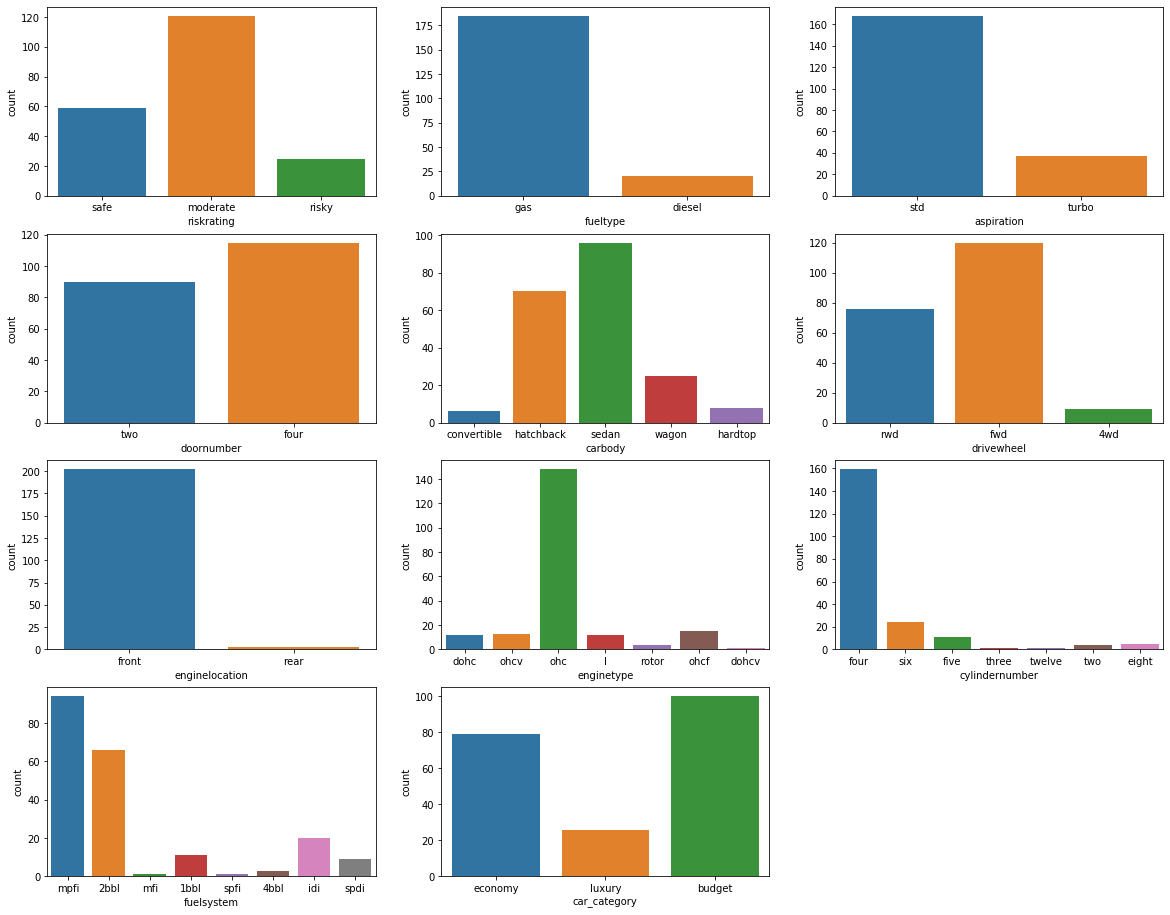

In [33]:
plt.figure(figsize=(20,16))

count = 1
for category in categorical_variables:
  plt.subplot(4,3,count)
  sns.countplot(x=category, data=automobile)
  count = count+1

count = 0

We see that,
1. Risktaking : Moderate
2. Fueltype : Gas
3. aspiration : std
4. doornumber : 4
5. Carbody : Sedan
6. Drivebody : fwd
7. Enginelocation : Front
8. Enginetype : ohc
9. Cylindernumber : 4
10. fuelsystem : mpfi
11. Segment : Budget

are most favourable in terms of sells. 

## Step-2: Preparing the data for modeling

*   For binary categorical variables, we will convert yes -> 1, No -> 0.

*   Create dummy variable



In [34]:
categorical_variables = ['riskrating','brand','model','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','car_category']

In [35]:
automobile.head(5)

,riskrating,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_category
0,safe,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,economy
1,safe,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,economy
2,moderate,quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,economy
3,safe,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,economy
4,safe,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,economy


In [36]:
automobile.model.unique()

array(['giulia', 'stelvio', 'quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'mu-x', 'd-max', 'd-max v-cross', 'xj', 'xf', 'xk',
       'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc', 'rx-7 gs',
       'glc 4', 'glc custom l', 'glc custom', 'electra 225 custom',
       'century luxus (sw)', 'century', 'skyhawk', 'opel isuzu deluxe',
       'skylark', 'century special', 'regal sport coupe (turbo)',
       'cougar', 'mirage', 'lancer', 'outlander', 'g4', 'mirage g4',
       'montero', 'pajero', 'versa', 'gt-r', 'rogue', 'latio', 'titan',
       'leaf', 'juke', 'note', 'clipper', '

As model has too many kinds , let us consider only the brand and get rid of model column.

In [37]:
automobile.drop('model', axis=1, inplace=True)

In [38]:
automobile.head()

,riskrating,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_category
0,safe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,economy
1,safe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,economy
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,economy
3,safe,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,economy
4,safe,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,economy


In [39]:
#converting non numeric categorical data

#create dummy variables
def create_dummies(df, col, drop_first, suffix=False):
    if suffix:
        df[col] = df[col].apply(lambda x: str(x)+'_'+col)
    temp_df = pd.get_dummies(df[col], drop_first=drop_first)
    df = pd.concat([df,temp_df],axis=1)
    df.drop(col, axis=1, inplace= True)
    return df

def create_dummies_drop_first(df, col, suffix=False):
    return create_dummies(df,col,True, suffix)

In [40]:
automobile.head()


,riskrating,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_category
0,safe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,economy
1,safe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,economy
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,economy
3,safe,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,economy
4,safe,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,economy


In [41]:
automobile.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [42]:
automobile.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [43]:
automobile.doornumber.unique()

array(['two', 'four'], dtype=object)

In [44]:
automobile.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [45]:
automobile.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [46]:
automobile.enginelocation.unique() #rename

array(['front', 'rear'], dtype=object)

In [47]:
automobile.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [48]:
automobile.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [49]:
automobile.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [50]:
# Converting categorical variables with two levels to either 1 or 0
automobile['fueltype'] = automobile['fueltype'].map({'gas': 1, 'diesel': 0})
automobile['aspiration'] = automobile['aspiration'].map({'std': 1, 'turbo': 0})
automobile['enginelocation'] = automobile['enginelocation'].map({'front': 1, 'rear': 0})

#creating dummies
automobile = create_dummies_drop_first(automobile,'riskrating',suffix=True)
automobile = create_dummies_drop_first(automobile,'carbody',suffix=True)
automobile = create_dummies_drop_first(automobile,'drivewheel',suffix=True)
automobile = create_dummies_drop_first(automobile,'enginetype',suffix=True)
automobile = create_dummies_drop_first(automobile,'fuelsystem',suffix=True)
automobile = create_dummies_drop_first(automobile,'car_category',suffix=True)

In [51]:
automobile.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,rotor_enginetype,2bbl_fuelsystem,4bbl_fuelsystem,idi_fuelsystem,mfi_fuelsystem,mpfi_fuelsystem,spdi_fuelsystem,spfi_fuelsystem,economy_car_category,luxury_car_category
0,1,1,two,1,88.6,168.8,64.1,48.8,2548,four,...,0,0,0,0,0,1,0,0,1,0
1,1,1,two,1,88.6,168.8,64.1,48.8,2548,four,...,0,0,0,0,0,1,0,0,1,0
2,1,1,two,1,94.5,171.2,65.5,52.4,2823,six,...,0,0,0,0,0,1,0,0,1,0
3,1,1,four,1,99.8,176.6,66.2,54.3,2337,four,...,0,0,0,0,0,1,0,0,1,0
4,1,1,four,1,99.4,176.6,66.4,54.3,2824,five,...,0,0,0,0,0,1,0,0,1,0


In [52]:
#converting doornumber two: 2, four:4
automobile['doornumber'] = automobile['doornumber'].map({'two':2,'four':4})

#converting cylindernumber to numerals two: 2, four:4 ...
automobile['cylindernumber'] = automobile['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [53]:
automobile.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,rotor_enginetype,2bbl_fuelsystem,4bbl_fuelsystem,idi_fuelsystem,mfi_fuelsystem,mpfi_fuelsystem,spdi_fuelsystem,spfi_fuelsystem,economy_car_category,luxury_car_category
0,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,1,0,0,1,0
1,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,1,0,0,1,0
2,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,0,1,0,0,1,0
3,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,1,0,0,1,0
4,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,1,0,0,1,0


## Spliting train and test data

In [54]:
df_train, df_test = train_test_split(automobile, train_size = 0.7, random_state=100)

In [55]:
print(df_train.shape)
print(df_test.shape)

(143, 42)
(62, 42)


In [56]:
automobile.head(4)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,rotor_enginetype,2bbl_fuelsystem,4bbl_fuelsystem,idi_fuelsystem,mfi_fuelsystem,mpfi_fuelsystem,spdi_fuelsystem,spfi_fuelsystem,economy_car_category,luxury_car_category
0,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,1,0,0,1,0
1,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,1,0,0,1,0
2,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,0,1,0,0,1,0
3,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,1,0,0,1,0


## Rescaling the features

In [57]:
## normalisation (x-min)/(max-min)
# instantiate scaler
scaler = MinMaxScaler()

# list of numeric variable
num_vars = ['doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#fit 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,rotor_enginetype,2bbl_fuelsystem,4bbl_fuelsystem,idi_fuelsystem,mfi_fuelsystem,mpfi_fuelsystem,spdi_fuelsystem,spfi_fuelsystem,economy_car_category,luxury_car_category
122,1,1,1.0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,...,0,1,0,0,0,0,0,0,0,0
125,1,1,0.0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,...,0,0,0,0,0,1,0,0,0,1
166,1,1,0.0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0.0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,...,0,0,0,0,0,1,0,0,1,0
199,1,0,1.0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,...,0,0,0,0,0,1,0,0,1,0


## Training the model

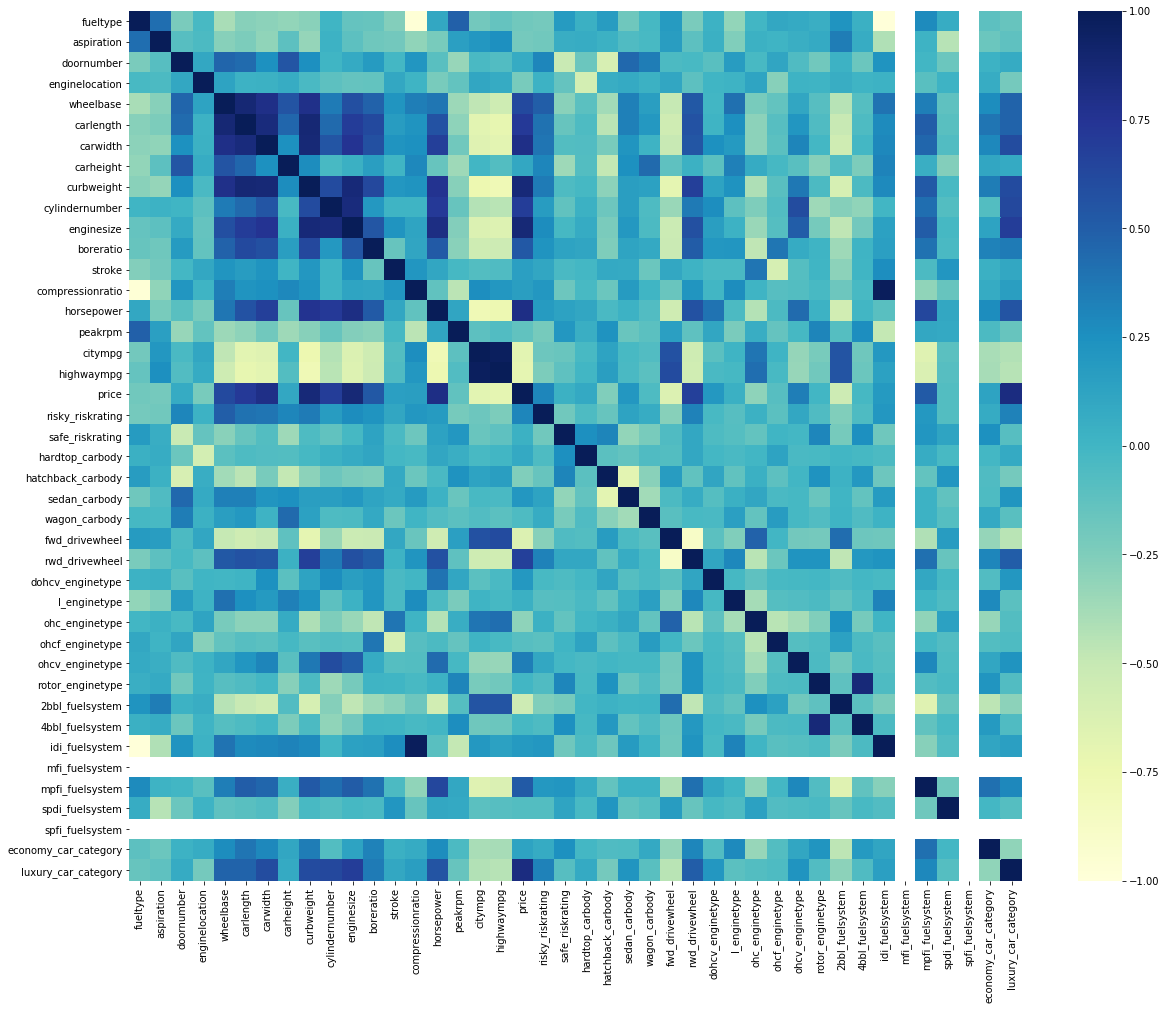

In [58]:
# heatmap
plt.figure(figsize=(20,16))
sns.heatmap(df_train.corr(),  cmap='YlGnBu')
plt.show()

In [59]:
y_train = df_train.pop('price')
X_train = df_train

## Feature selection using RFE

In [60]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', True, 1),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', False, 11),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('citympg', True, 1),
 ('highwaympg', False, 13),
 ('risky_riskrating', False, 12),
 ('safe_riskrating', False, 17),
 ('hardtop_carbody', False, 5),
 ('hatchback_carbody', False, 2),
 ('sedan_carbody', False, 4),
 ('wagon_carbody', False, 3),
 ('fwd_drivewheel', False, 16),
 ('rwd_drivewheel', False, 24),
 ('dohcv_enginetype', True, 1),
 ('l_enginetype', False, 20),
 ('ohc_enginetype', False, 10),
 ('ohcf_enginetype', False, 14),
 ('ohcv_enginetype', False, 19),
 ('rotor_enginetype', False, 7),
 ('2bbl_fuelsystem', False, 22),
 ('4bbl_fuelsystem', False, 25),
 ('idi_fue

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'aspiration', 'enginelocation', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'dohcv_enginetype',
       'idi_fuelsystem', 'luxury_car_category'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['doornumber', 'wheelbase', 'carlength', 'carheight', 'peakrpm',
       'highwaympg', 'risky_riskrating', 'safe_riskrating', 'hardtop_carbody',
       'hatchback_carbody', 'sedan_carbody', 'wagon_carbody', 'fwd_drivewheel',
       'rwd_drivewheel', 'l_enginetype', 'ohc_enginetype', 'ohcf_enginetype',
       'ohcv_enginetype', 'rotor_enginetype', '2bbl_fuelsystem',
       '4bbl_fuelsystem', 'mfi_fuelsystem', 'mpfi_fuelsystem',
       'spdi_fuelsystem', 'spfi_fuelsystem', 'economy_car_category'],
      dtype='object')

In [65]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Model 1 (Using RFE selected features)

In [66]:
import statsmodels.api as sm  

In [67]:
def build_lm(X_train, y_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train).fit()
    print(lm.summary())
    return X_train

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [68]:
X_train_new = build_lm(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     147.9
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           8.50e-72
Time:                        10:59:18   Log-Likelihood:                 220.26
No. Observations:                 143   AIC:                            -410.5
Df Residuals:                     128   BIC:                            -366.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3028    

In [69]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
0,fueltype,498.34
13,idi_fuelsystem,136.47
9,compressionratio,83.35
6,enginesize,66.90
5,cylindernumber,25.21
4,curbweight,15.63
10,horsepower,12.87
7,boreratio,8.87
11,citympg,6.48
3,carwidth,5.53


Let us remove citympg as it has high p value as well as we see it has high correlation with highwaympg. So, we can simply remove that column from the model.

In [70]:
X_train_new = X_train_rfe.drop(["citympg"], axis = 1)

In [71]:
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     159.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           9.67e-73
Time:                        10:59:28   Log-Likelihood:                 219.83
No. Observations:                 143   AIC:                            -411.7
Df Residuals:                     129   BIC:                            -370.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3246    

In [72]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
0,fueltype,375.04
12,idi_fuelsystem,134.58
9,compressionratio,76.60
6,enginesize,58.46
5,cylindernumber,24.52
4,curbweight,11.98
10,horsepower,9.21
7,boreratio,8.34
3,carwidth,5.52
8,stroke,4.27


As fueltype has high p value and high VIF value, we can remove that next and calculate the model.

In [73]:
X_train_new = X_train_new.drop(["fueltype"], axis = 1)

In [74]:
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     159.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           9.67e-73
Time:                        10:59:32   Log-Likelihood:                 219.83
No. Observations:                 143   AIC:                            -411.7
Df Residuals:                     129   BIC:                            -370.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2439    

In [75]:
X_train_new = X_train_new.drop('const', axis = 1)

In [76]:
calculate_vif(X_train_new)

,Features,VIF
8,compressionratio,126.52
5,enginesize,117.61
1,enginelocation,106.37
11,idi_fuelsystem,101.70
4,cylindernumber,80.73
3,curbweight,55.65
2,carwidth,38.16
7,stroke,31.56
6,boreratio,30.25
9,horsepower,22.67


The p value for dohcv_enginetype is high. Let us remove that as it is insignificant.

In [77]:
X_train_new = X_train_new.drop(["dohcv_enginetype"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     171.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.61e-73
Time:                        10:59:35   Log-Likelihood:                 218.93
No. Observations:                 143   AIC:                            -411.9
Df Residuals:                     130   BIC:                            -373.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3085    

In [78]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
8,compressionratio,122.61
5,enginesize,101.40
1,enginelocation,100.16
10,idi_fuelsystem,97.26
4,cylindernumber,74.51
3,curbweight,54.27
2,carwidth,37.38
7,stroke,31.19
6,boreratio,28.60
9,horsepower,17.74


The VIF value of compressionratio is high. So let us drop and remake the model.

In [79]:
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           2.67e-73
Time:                        10:59:37   Log-Likelihood:                 215.48
No. Observations:                 143   AIC:                            -407.0
Df Residuals:                     131   BIC:                            -371.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2892    

In [80]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
1,enginelocation,97.96
5,enginesize,94.34
4,cylindernumber,70.16
3,curbweight,53.37
2,carwidth,37.36
7,stroke,31.15
6,boreratio,28.23
8,horsepower,16.46
0,aspiration,8.45
10,luxury_car_category,2.52


Removing enginelocation based on the VIF value.

In [81]:
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     191.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.68e-73
Time:                        10:59:39   Log-Likelihood:                 213.07
No. Observations:                 143   AIC:                            -404.1
Df Residuals:                     132   BIC:                            -371.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1734    

In [82]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
2,curbweight,43.48
4,enginesize,39.39
1,carwidth,37.34
3,cylindernumber,24.86
7,horsepower,14.76
5,boreratio,12.91
6,stroke,9.61
0,aspiration,8.15
9,luxury_car_category,2.47
8,idi_fuelsystem,2.14


Let us drop curbweight as it has high vif. so it is insignificant

In [83]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     206.7
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.17e-73
Time:                        10:59:41   Log-Likelihood:                 210.53
No. Observations:                 143   AIC:                            -401.1
Df Residuals:                     133   BIC:                            -371.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2297    

In [84]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
3,enginesize,28.12
2,cylindernumber,23.76
1,carwidth,23.72
6,horsepower,14.51
4,boreratio,12.72
5,stroke,9.60
0,aspiration,8.10
8,luxury_car_category,2.42
7,idi_fuelsystem,2.08


Let us drop aspiration as it has high p value. 

In [85]:
X_train_new = X_train_new.drop(["aspiration"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     228.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           3.70e-74
Time:                        10:59:43   Log-Likelihood:                 208.81
No. Observations:                 143   AIC:                            -399.6
Df Residuals:                     134   BIC:                            -373.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2569    

In [86]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
2,enginesize,27.39
0,carwidth,23.60
1,cylindernumber,16.26
5,horsepower,11.54
3,boreratio,9.97
4,stroke,7.97
7,luxury_car_category,2.41
6,idi_fuelsystem,1.59


The vif value of enginesize is very high. So, let us remove that column from the model as it is insignificant.

In [87]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     173.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           3.09e-64
Time:                        10:59:45   Log-Likelihood:                 181.53
No. Observations:                 143   AIC:                            -347.1
Df Residuals:                     135   BIC:                            -323.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0628    

In [88]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
0,carwidth,23.57
1,cylindernumber,10.24
2,boreratio,9.33
4,horsepower,8.80
3,stroke,7.97
6,luxury_car_category,2.03
5,idi_fuelsystem,1.45


The cylindernumber p value is very much high. Hence, it is insignificant for the model. 

In [89]:
X_train_new = X_train_new.drop(["cylindernumber"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     203.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           2.09e-65
Time:                        10:59:47   Log-Likelihood:                 181.52
No. Observations:                 143   AIC:                            -349.0
Df Residuals:                     136   BIC:                            -328.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0656    

In [90]:
X_train_new1 = X_train_new
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
0,carwidth,22.06
1,boreratio,9.25
3,horsepower,7.33
2,stroke,7.24
5,luxury_car_category,1.94
4,idi_fuelsystem,1.44


As boreration as high p value and high VIF. let us drop it.

In [91]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     245.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.65e-66
Time:                        10:59:49   Log-Likelihood:                 181.24
No. Observations:                 143   AIC:                            -350.5
Df Residuals:                     137   BIC:                            -332.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0544    

In [92]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
0,carwidth,15.29
1,stroke,7.24
2,horsepower,7.13
4,luxury_car_category,1.86
3,idi_fuelsystem,1.44


Let us remove stroke as it has high VIF and high p value

In [93]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           9.78e-68
Time:                        10:59:51   Log-Likelihood:                 181.13
No. Observations:                 143   AIC:                            -352.3
Df Residuals:                     138   BIC:                            -337.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0624    

In [94]:
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
0,carwidth,7.13
1,horsepower,7.11
3,luxury_car_category,1.64
2,idi_fuelsystem,1.44


Let us drop the carwidth as it has high VIF.

In [95]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)
X_train_new = build_lm(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     353.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           7.51e-65
Time:                        10:59:55   Log-Likelihood:                 171.10
No. Observations:                 143   AIC:                            -334.2
Df Residuals:                     139   BIC:                            -322.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0036    

In [96]:
X_train_new1 = X_train_new
X_train_new = X_train_new.drop('const', axis = 1)
calculate_vif(X_train_new)

,Features,VIF
2,luxury_car_category,1.63
0,horsepower,1.59
1,idi_fuelsystem,1.07


## Residual analysis of train data

In [97]:
X_train_new1 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train, X_train_new1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     353.8
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           7.51e-65
Time:                        10:59:58   Log-Likelihood:                 171.10
No. Observations:                 143   AIC:                            -334.2
Df Residuals:                     139   BIC:                            -322.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0036    

In [98]:
y_train_price = lm.predict(X_train_new1)

In [99]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

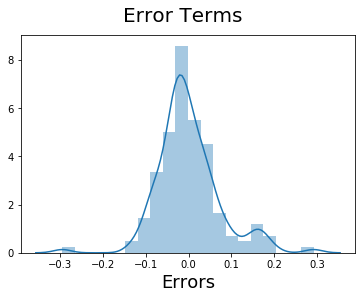

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms seems to be normally distributed with the mean as 0. That means we have got a good model. 

In [101]:
num_vars = ['doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [102]:
y_test = df_test.pop('price')
X_test = df_test

In [103]:
X_train_new.columns

Index(['horsepower', 'idi_fuelsystem', 'luxury_car_category'], dtype='object')

In [104]:
# X_train_new.drop('const', axis=1, inplace=True)
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [105]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

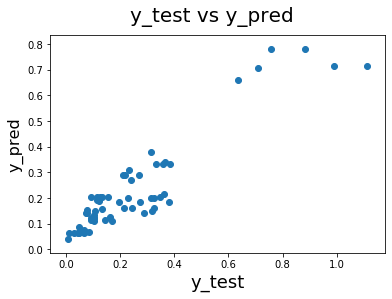

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.09474278652596982
Model r2_score: 0.8320581471478742


We have r2 value in the test data set as 0.83.

'horsepower', 'idi_fuelsystem', 'luxury_car_category' are the significant one. 

The company should plan to produce cars above 20000 , with fuelsystem as IDI. They should also consider the following if feasible as it is showing a comparatively increase in price point of view.